<a href="https://colab.research.google.com/github/olvsegun/articles_and_webinars/blob/master/Working_with_PDF_file.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Working with PDF files**

PDF files are great way of exchanging documents reliably, without the fear of mis-formatting during exchange. However, extracting the information of PDFs can sometimes be a pain. Unlike flat files that are easy to manipulate in python (for being structured), PDF files are not as easy to manipulate.

This short tutorial wil cover




*   Loading tables from PDFs into Pandas DataFrame
*   Loading PDF into python environment
*   Extracting text from PDF 
*   Using Pandas with PDFs


We are going to be using three libraries, `pandas` which I assume you are already familiar with, `PyPDF2` and `tabula`.

Before we go on, we have to be sure we have these libraries installed

```pip install PyPDF2```

```pip install tabula-py```

`tabula` is dependent on `Java` and `python 3.7`, so be sure to have them. You can check for the Java environment you have on your environment by running

```!java -version```


If all of these have been installed, its time to start working with PDFS!





**Loading tables from PDFs into Pandas DataFrame**

To read a PDF file, we use the `read_pdf()` method of `tabula`

In [0]:
!pip install PyPDF2

     |████████████████████████████████| 81kB 2.3MB/s 
  Created wheel for PyPDF2: filename=PyPDF2-1.26.0-cp36-none-any.whl size=61086 sha256=281be3520165ac111932f6ab9f6b0315d4f4073fd32f3517d8bd121661958fb0
  Stored in directory: /root/.cache/pip/wheels/53/84/19/35bc977c8bf5f0c23a8a011aa958acd4da4bbd7a229315c1b7
Successfully built PyPDF2


In [0]:
!pip install tabula-py

     |████████████████████████████████| 10.4MB 2.6MB/s 


In [0]:
import tabula as tb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

%matplotlib inline


ModuleNotFoundError: ignored

In [0]:
url = "https://drive.google.com/open?id=1ebSPitmhTXPBGAbuYJOl3HQQdLuVNHdB"
local_path = "table_data.pdf"
pdf = tb.read_pdf(local_path)
pdf

'pages' argument isn't specified.Will extract only from page 1 by default.
Got stderr: Apr 16, 2020 12:27:31 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
Apr 16, 2020 12:27:32 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[     mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear
 0   21.0    6  160.0  110  3.90  2.620  16.46   0   1     4
 1   21.0    6  160.0  110  3.90  2.875  17.02   0   1     4
 2   22.8    4  108.0   93  3.85  2.320  18.61   1   1     4
 3   21.4    6  258.0  110  3.08  3.215  19.44   1   0     3
 4   18.7    8  360.0  175  3.15  3.440  17.02   0   0     3
 5   18.1    6  225.0  105  2.76  3.460  20.22   1   0     3
 6   14.3    8  360.0  245  3.21  3.570  15.84   0   0     3
 7   24.4    4  146.7   62  3.69  3.190  20.00   1   0     4
 8   22.8    4  140.8   95  3.92  3.150  22.90   1   0     4
 9   19.2    6  167.6  123  3.92  3.440  18.30   1   0     4
 10  17.8    6  167.6  123  3.92  3.440  18.90   1   0     4
 11  16.4    8  275.8  180  3.07  4.070  17.40   0   0     3
 12  17.3    8  275.8  180  3.07  3.730  17.60   0   0     3
 13  15.2    8  275.8  180  3.07  3.780  18.00   0   0     3
 14  10.4    8  472.0  205  2.93  5.250  17.98   0   0     3
 15  10.4    8  460.0  2

As we have not specified what page to read from, it only reads the first page. Also if you have a look at the output, it is a list. The reason for this is that by default, `multiple_tables` is set to `True`, which means if there are multiple tables on a page, itreturns a list of all the tables on that page. What we can do is extract by index.

In [0]:
cars = pdf[0]
cars.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3


Now we have it in a `DataFrame`. We can now explore our data 

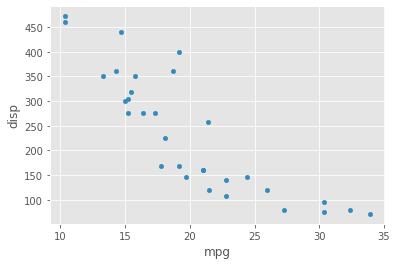

In [0]:
cars.plot(kind='scatter', x='mpg', y='disp')

If you want to load from all pages in one go, then you need to pass the argument `pages='all'`. This reads from all pages into one list.

In [0]:
all_pages = tb.read_pdf(local_path, pages='all', stream=True)
len(all_pages)

Got stderr: Apr 16, 2020 12:29:09 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
Apr 16, 2020 12:29:09 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



4

In [0]:
print(all_pages)

[             Unnamed: 0   mpg  cyl   disp   hp  ...   qsec  vs  am  gear  carb
0             Mazda RX4  21.0    6  160.0  110  ...  16.46   0   1     4     4
1         Mazda RX4 Wag  21.0    6  160.0  110  ...  17.02   0   1     4     4
2            Datsun 710  22.8    4  108.0   93  ...  18.61   1   1     4     1
3        Hornet 4 Drive  21.4    6  258.0  110  ...  19.44   1   0     3     1
4     Hornet Sportabout  18.7    8  360.0  175  ...  17.02   0   0     3     2
5               Valiant  18.1    6  225.0  105  ...  20.22   1   0     3     1
6            Duster 360  14.3    8  360.0  245  ...  15.84   0   0     3     4
7             Merc 240D  24.4    4  146.7   62  ...  20.00   1   0     4     2
8              Merc 230  22.8    4  140.8   95  ...  22.90   1   0     4     2
9              Merc 280  19.2    6  167.6  123  ...  18.30   1   0     4     4
10            Merc 280C  17.8    6  167.6  123  ...  18.90   1   0     4     4
11           Merc 450SE  16.4    8  275.8  180  ...

In [0]:
for page in all_pages:
  print(page)

             Unnamed: 0   mpg  cyl   disp   hp  ...   qsec  vs  am  gear  carb
0             Mazda RX4  21.0    6  160.0  110  ...  16.46   0   1     4     4
1         Mazda RX4 Wag  21.0    6  160.0  110  ...  17.02   0   1     4     4
2            Datsun 710  22.8    4  108.0   93  ...  18.61   1   1     4     1
3        Hornet 4 Drive  21.4    6  258.0  110  ...  19.44   1   0     3     1
4     Hornet Sportabout  18.7    8  360.0  175  ...  17.02   0   0     3     2
5               Valiant  18.1    6  225.0  105  ...  20.22   1   0     3     1
6            Duster 360  14.3    8  360.0  245  ...  15.84   0   0     3     4
7             Merc 240D  24.4    4  146.7   62  ...  20.00   1   0     4     2
8              Merc 230  22.8    4  140.8   95  ...  22.90   1   0     4     2
9              Merc 280  19.2    6  167.6  123  ...  18.30   1   0     4     4
10            Merc 280C  17.8    6  167.6  123  ...  18.90   1   0     4     4
11           Merc 450SE  16.4    8  275.8  180  ... 

You can also specify the page you want to read from by passing the page number to the `pages` argument.

In [0]:
from_page_1 = tb.read_pdf(local_path, pages=1)
from_page_1[0].head()

Got stderr: Apr 16, 2020 1:57:51 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
Apr 16, 2020 1:57:51 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3


In [0]:
from_page_2 = tb.read_pdf(local_path, pages=)
from_page_1[0].head()

Got stderr: Apr 16, 2020 2:10:08 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
Apr 16, 2020 2:10:08 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[   Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
 0           5.1          3.5           1.4          0.2  setosa
 1           4.9          3.0           1.4          0.2  setosa
 2           4.7          3.2           1.3          0.2  setosa
 3           4.6          3.1           1.5          0.2  setosa
 4           5.0          3.6           1.4          0.2  setosa
 5           5.4          3.9           1.7          0.4  setosa,
    Unnamed: 0  Sepal.Length  Sepal.Width  Petal.Length  Petal.Width    Species
 0         145           6.7          3.3           5.7          2.5  virginica
 1         146           6.7          3.0           5.2          2.3  virginica
 2         147           6.3          2.5           5.0          1.9  virginica
 3         148           6.5          3.0           5.2          2.0  virginica
 4         149           6.2          3.4           5.4          2.3  virginica
 5         150           5.9          3.0           5.1         

If there are multiple tables on the page, then you can select the table of interest using indexing.

Let us select the second table on the page.

In [0]:
from_page_2[1]

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,145,6.7,3.3,5.7,2.5,virginica
1,146,6.7,3.0,5.2,2.3,virginica
2,147,6.3,2.5,5.0,1.9,virginica
3,148,6.5,3.0,5.2,2.0,virginica
4,149,6.2,3.4,5.4,2.3,virginica
5,150,5.9,3.0,5.1,1.8,virginica


In [0]:
furniture = tb.read_pdf("Furniture_sales.pdf", pages='1-20', stream=True, pandas_options={"header": [0, 1, 2, 3]})
len(furniture)

20

In [0]:
furniture[1]

,0,1,2,3
0,"Owen, Robert",Chameleon Couch,SW,Home Emporium
1,"Owen, Robert",Chameleon Couch,SW,Home Emporium
2,"Leon, Emily",Media Armoire,SW,Ellington Designs
3,"Leon, Emily",Media Armoire,SW,Ellington Designs
4,"Vaughn, Harlon",Bamboo Coffee Table,NE,B&B Spaces
5,"Vaughn, Harlon",Bamboo Coffee Table,NE,B&B Spaces
6,"Vaughn, Harlon",Bamboo End Table,NE,B&B Spaces
7,"Vaughn, Harlon",Bamboo End Table,NE,B&B Spaces
8,"Kelly, Icelita",Bamboo End Table,SW,B&B Spaces
9,"Leon, Emily",Chameleon Couch,SW,Home Emporium


In [0]:
df = furniture[0]
for page in range(1,len(furniture)):
  df = pd.concat([df, furniture[page]], axis=0)
df

,0,1,2,3
0,Salesperson,Product,Region,Customer
1,"Vaughn, Harlon",Captain Recliner,NE,B&B Spaces
2,"Norman, Rita",Media Armoire,SE,Home USA
3,"Christensen, Jill",Bamboo End Table,NW,Ellington Designs
4,"Norman, Rita",Bamboo Coffee Table,SE,Ellington Designs
...,...,...,...,...
14,"Byrd, Asa",Media Armoire,SE,Home Emporium
15,"Owen, Robert",Media Armoire,SW,Fabulous Homes
16,"Christensen, Jill",Bamboo End Table,NW,Ellington Designs
17,"Norman, Rita",Bamboo Coffee Table,SE,Home USA


In [0]:
df.columns = df.iloc[0]
df.drop(0, axis=0, inplace=True)
df.reset_index().drop(columns=['index'], inplace=True)

In [0]:
df.head()

,Salesperson,Product,Region,Customer
1,"Vaughn, Harlon",Captain Recliner,NE,B&B Spaces
2,"Norman, Rita",Media Armoire,SE,Home USA
3,"Christensen, Jill",Bamboo End Table,NW,Ellington Designs
4,"Norman, Rita",Bamboo Coffee Table,SE,Ellington Designs
5,"Byrd, Asa",Bamboo End Table,SE,B&B Spaces


In [0]:
sales_by_person_region = pd.pivot_table(df, values='Product', index='Salesperson', columns='Region', aggfunc='count')

In [0]:
sales_by_person_region.fillna(0, inplace=True)
sales_by_person_region

Region,NE,NW,SE,SW
Salesperson,,,,
"Arnold, Cole",51.0,18.0,0.0,0.0
"Byrd, Asa",0.0,0.0,58.0,0.0
"Christensen, Jill",0.0,96.0,0.0,0.0
"Kelly, Icelita",0.0,0.0,0.0,78.0
"Leon, Emily",0.0,0.0,0.0,63.0
"Livingston, Lynette",53.0,0.0,0.0,0.0
"Lucas, John",0.0,0.0,0.0,51.0
"Maynard, Susan",83.0,0.0,0.0,0.0
"McCullough, Scott",0.0,56.0,0.0,0.0


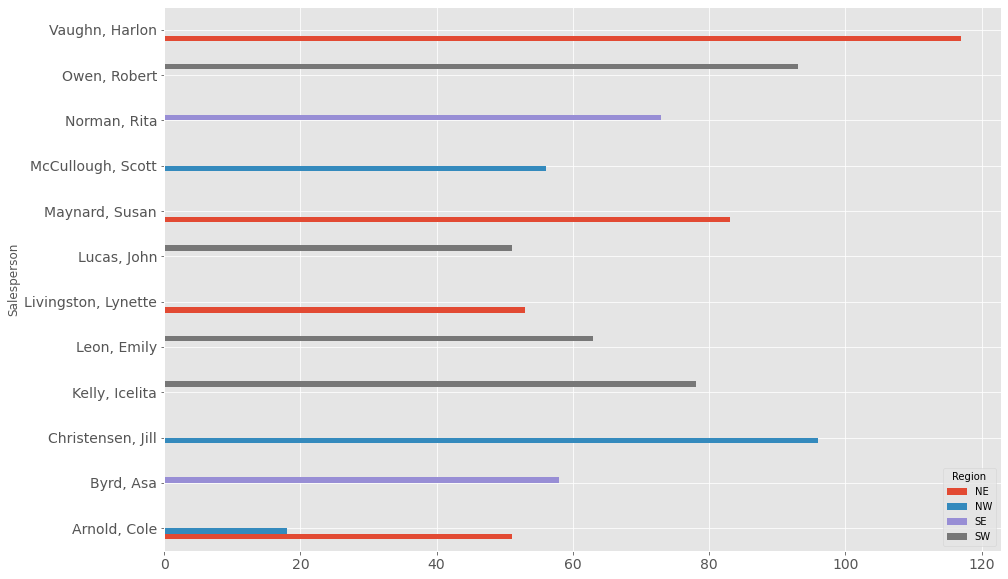

In [0]:
sales_by_person_region.plot(kind='barh', figsize=(15, 10), fontsize=14)

In [0]:
sales_by_person_customer = pd.pivot_table(df, values='Product', index='Salesperson', columns='Customer', aggfunc='count')
sales_by_person_customer.fillna(0, inplace=True)
sales_by_person_customer

Customer,B&B Spaces,Ellington Designs,Fabulous Homes,Home Emporium,Home USA
Salesperson,,,,,
"Arnold, Cole",14,14,11,14,16
"Byrd, Asa",12,11,9,17,9
"Christensen, Jill",19,20,19,18,20
"Kelly, Icelita",13,16,18,13,18
"Leon, Emily",15,15,20,5,8
"Livingston, Lynette",13,7,12,7,14
"Lucas, John",16,12,8,9,6
"Maynard, Susan",19,19,10,18,17
"McCullough, Scott",7,11,12,14,12


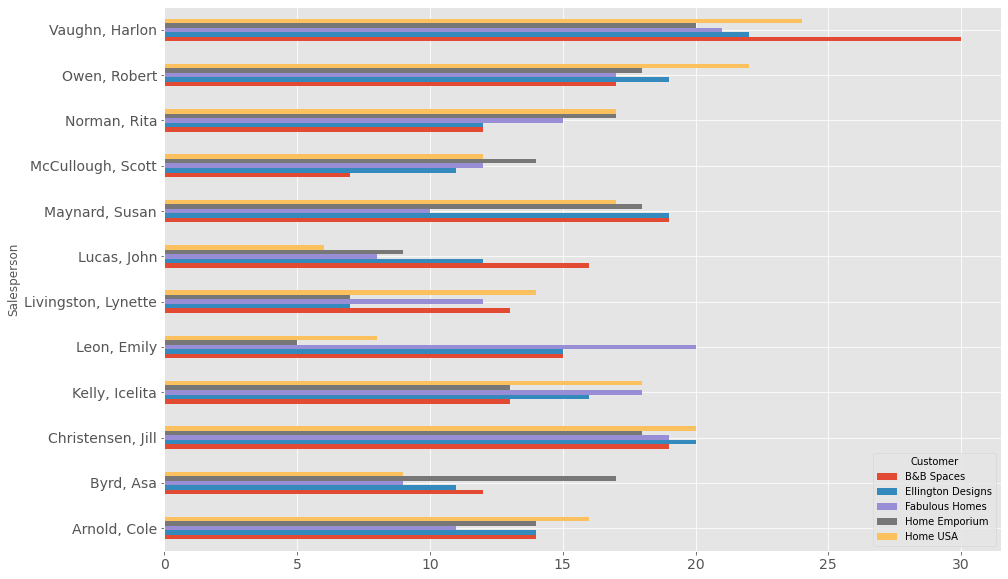

In [0]:
sales_by_person_customer.plot(kind='barh', figsize=(15, 10), fontsize=14)


What if you eanted to convert a pdf file to a csv of excel file? Tabula offers the option to convert into 

**Loading PDFs into Python environment**

Let us look at a different library for loading pdf content, especially if you are looking at text analysis and Natural Language Processing (NLP).

The PyPDF2 library offers the opportunity to do this. Let us see this at work

In [0]:
import PyPDF2 as pp

# create a pdf reader object
pdf_file = open("occupational-brief-data-analyst.pdf", "rb")

# create a reader object from the PyPDF2 library
# this read the content of thepdf file into a reader object
# that we can interact with.
pdf_reader = pp.PdfFileReader(pdf_file)

# now that we have a pdf reader, we can do all sort such as 
# 1. get the number of pages in the pdf file
num_pages = pdf_reader.numPages 
print(f"The number of pages in the file is: {num_pages}")
print("=================================================")

# 2. Slice a page from the pdf file
new_page = pdf_reader.getPage(1) # pages are zero index


# 3. Extract the content of the page
content = new_page.extractText()
print(content)

pdf_file.close()

The number of pages in the file is: 13
[Type here]
 
 
Page 
1
 
 
 
Digital Industries Apprenticeships
: Occupational Brief
 
Level 4 
Data Analyst 
Apprenticeship
 
Minimum Standards
 
and Grading Crit
eria 
 
This paper defines the minimum r
equirements for the knowledge, skills and behaviours defined in the standard, which are required for a pass.   It also 
defines the criteria to be used for awarding the grade for merit or distinction.  
This paper should be read in conjunction with the Stand
ard and 
A
ssessment Plan for the Level 4 Data Analyst 
Apprenticeship
 
Overview of Grading  
 
There are three sets of criteria on which the assessment and grading is made.  The three criteria are 
 
The What: what the apprentice has shown they can do,
 
The How: t
he way in which the work has been done
 
The With Whom: The personal and interpersonal qualities the apprentice has brought to all their work relationships
 
Each of these three criteria has minimum (expected) requirements, whic

In [0]:
len(content)

1990